In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import math

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [6]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
y_train = train_data['Survived'].to_numpy()
y_train.shape

(891,)

In [9]:
X_train = train_data.drop("Survived", axis = 1).to_numpy()
X_train.shape

(891, 11)

In [65]:
train_data["Age"][train_data["Age"].isnull()]

Series([], Name: Age, dtype: float64)

In [58]:
np.median(train_data["Age"][train_data["Age"].isnull() == False])

28.0

In [64]:
train_data["Age"][train_data["Age"].isnull()] = np.median(train_data["Age"][train_data["Age"].isnull() == False])

/tmp/ipykernel_32/1096893338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["Age"][train_data["Age"].isnull()] = np.median(train_data["Age"][train_data["Age"].isnull() == False])


In [68]:
X_train = train_data[["Pclass", "Age", "SibSp", "Parch", "Fare"]].to_numpy()
X_train.shape

(891, 5)

In [16]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [17]:
def compute_cost_logistic(X, y, w, b, lambda_):
    m, n = X.shape
    cost = 0
    
    for i in range(m):
        z_i = np.dot(X[i], w) + b
        f_wb_i = sigmoid(z_i)
        cost += -y[i] * np.log(f_wb_i) - (1 - y[i]) * np.log(1 - f_wb_i)

    cost /=  m
    
    reg_term = 0
    for j in range(n):
        reg_term += (w[j] ** 2)
    reg_term = reg_term * (lambda_ / (2 * m))
    
    total_cost = cost + reg_term
    
    return total_cost

In [37]:
X_temp = X_train[1].reshape(1,4)
y_temp = y_train[1].reshape(1,1)
w = 0.01 * (np.random.rand(4) - 0.5)
b = 0
lambda_ = 0.001
compute_cost_logistic(X_temp, y_temp, w, b, lambda_)

array([0.69829464])

In [18]:
def compute_gradient_logistic(X, y, w, b, lambda_):
    m,n = X.shape
    
    dj_dw = np.zeros(n,)
    dj_db = 0
    
    for i in range(m):
        z_i = np.dot(X[i], w) + b
        f_wb_i = sigmoid(z_i)
        err_i = f_wb_i - y[i]
        for j in range(n):
            dj_dw[j] += err_i * X[i][j]
        dj_db += err_i
    dj_dw /= m
    dj_db /= m
    
    for j in range(n):
        dj_dw[j] += w[j] * (lambda_ / m)
    
    return dj_dw, dj_db

In [19]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters, lambda_):
    m = len(X)
    
    J_history = []
    w_history = []
    
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient_logistic(X, y, w_in, b_in, lambda_)
        
        w_in -= alpha * dj_dw
        b_in -= alpha * dj_db
        
        if i < 100000:
            cost = compute_cost_logistic(X, y, w_in, b_in, lambda_)
            J_history.append(cost)
            
        if i % math.ceil(num_iters / 10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
            
    return w_in, b_in, J_history, w_history         

In [83]:
def predict(X, w, b):
    m, n = X.shape
    p = np.zeros(m)
    
    for i in range(m):
        z_i = np.dot(X[i], w) + b
        f_wb = sigmoid(z_i)
        
        p[i] = f_wb >= .5
        
    return p

In [99]:
np.random.seed(42)
initial_w = 0.01 * (np.random.rand(5) - 0.5)
initial_b = 0

iterations = 1000
alpha = 0.1e-3

w,b, J_history,_ = gradient_descent(X_train ,y_train, initial_w, initial_b, alpha, iterations, 0)

Iteration    0: Cost     0.72   
Iteration  100: Cost     0.63   
Iteration  200: Cost     0.63   
Iteration  300: Cost     0.63   
Iteration  400: Cost     0.62   
Iteration  500: Cost     0.62   
Iteration  600: Cost     0.62   
Iteration  700: Cost     0.62   
Iteration  800: Cost     0.62   
Iteration  900: Cost     0.62   
Iteration  999: Cost     0.62   


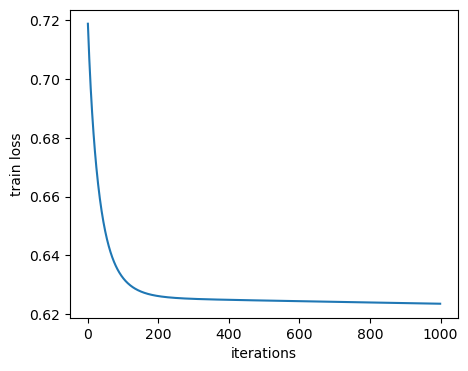

In [100]:
fig, ax = plt.subplots(1,1, figsize = (5,4))

ax.plot(J_history)
ax.set_ylabel("train loss")
ax.set_xlabel("iterations")
plt.show()

In [101]:
p = predict(X_train, w, b)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 66.666667


In [102]:
test_data["Age"][test_data["Age"].isnull()] = np.median(test_data["Age"][test_data["Age"].isnull() == False])

/tmp/ipykernel_32/3479104280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["Age"][test_data["Age"].isnull()] = np.median(test_data["Age"][test_data["Age"].isnull() == False])


In [114]:
X_test = test_data[["Pclass", "Age", "SibSp", "Parch", "Fare"]].to_numpy()
X_test.shape

(418, 5)

In [115]:
p = predict(X_test, w, b)

In [116]:
p.shape

(418,)

In [155]:
output = np.c_[test_data["PassengerId"].to_numpy(), p].astype(int)

In [157]:
output = pd.DataFrame(output, columns = ['PassengerId', 'Survived'])

In [165]:
output.to_csv("logistic_submission.csv", index = False)